In [125]:
import pandas as pd
import numpy as np
def trim_name(name_str):
    name_arr = name_str.split(" ")
    initial = name_arr[1][0:1]

    return "{} {}".format(name_arr[0], initial)

import seaborn as sns

In [31]:
df = pd.read_excel("badges.xlsx")
df = df.drop(["Age", "Invested", "End"], axis=1)
df = pd.melt(df, id_vars=["Patrol", "Name"], var_name="badge", value_name="info")
df.fillna(value = False, inplace=True)
df["Name"] = df["Name"].apply(lambda x: x[0:x.find("\n")])

df["Name"] = df["Name"].apply(trim_name)

df[["Passed", "Tasks", "Percent"]] = df["info"].str.split("\n", expand=True)

df = df.drop(["info"], axis = 1)


df.loc[df["Passed"] == "Badge Awarded", "Passed"] = True
df.loc[df["Passed"] == "Badge Not Awarded", "Passed"] = False

df

,Patrol,Name,badge,Passed,Tasks,Percent
0,Swifts,Ephraim R,Better World For Bp Badge (Special),False,0 of 1 Tasks Completed,0% Complete
1,Swifts,Matthew K,Better World For Bp Badge (Special),False,0 of 1 Tasks Completed,0% Complete
2,Swifts,Aiden M,Better World For Bp Badge (Special),False,0 of 1 Tasks Completed,0% Complete
3,Swifts,Cameron B,Better World For Bp Badge (Special),False,0 of 1 Tasks Completed,0% Complete
4,Swifts,Jack C,Better World For Bp Badge (Special),False,0 of 1 Tasks Completed,0% Complete
...,...,...,...,...,...,...
7651,Goshawks,Aidan B,Recruiter - Silver Badge (Action),False,0 of 1 Tasks Completed,0% Complete
7652,Goshawks,Bridget H,Recruiter - Silver Badge (Action),False,0 of 1 Tasks Completed,0% Complete
7653,Goshawks,Joel F,Recruiter - Silver Badge (Action),False,0 of 1 Tasks Completed,0% Complete
7654,Goshawks,Juliette M,Recruiter - Silver Badge (Action),False,0 of 1 Tasks Completed,0% Complete


In [56]:
passed_df = df[(df["Passed"] == True)]
passed_df = passed_df.rename({"Tasks":"Date", "Percent":"Scouter"}, axis = 1)
passed_df["Date"] = passed_df["Date"].str.extract(r"((?<=On ).*)", expand = False)
passed_df["Date"] = pd.to_datetime(passed_df["Date"], yearfirst=True )

passed_df["Scouter"] = passed_df["Scouter"].str.extract(r"((?<=By ).*)", expand = False)
passed_df = passed_df.reset_index().drop("index", axis = 1)
passed_df

,Patrol,Name,badge,Passed,Date,Scouter
0,Eagles,Alex C,Air Planner Badge (ScoutCraft),True,2021-09-02,David Knight
1,Eagles,Alex C,Aviation Skills Badge (ScoutCraft),True,2021-11-04,David Knight
2,Eagles,Oliver H,Aviation Skills Badge (ScoutCraft),True,2021-11-04,David Knight
3,Kestrels,Avila V,Canoeing Badge (ScoutCraft),True,2022-02-17,Daniel Le Jeune
4,Swifts,Jack C,Climbing Badge (ScoutCraft),True,2021-12-02,David Knight
...,...,...,...,...,...,...
291,Kestrels,Juliet D,COVID-19 Badge (Awareness),True,2020-09-10,David Knight
292,Goshawks,Alex M,COVID-19 Badge (Awareness),True,2020-07-22,David Knight
293,Goshawks,Ethan G,COVID-19 Badge (Awareness),True,2020-08-20,Jonathan Webb
294,Eagles,Alex C,Cub Instructor Badge (Award),True,2021-11-04,David Knight


In [63]:
passed_df.groupby("Name").count().sort_values(by = "Passed", ascending=False).drop(["Patrol", "badge", "Date", "Scouter"], axis = 1)

,Passed
Name,
Alex C,26
Luke F,24
James W,16
Ethan G,16
Joel F,16
Nina S,12
Jack C,11
Timothy B,10
Holly R,10


In [73]:
temp = passed_df[["Passed","badge"]].groupby("badge").count().sort_values(by = "Passed", ascending=False).reset_index()
temp

,badge,Passed
0,Swimming Badge (ScoutCraft),36
1,Fires & Cooking Badge (ScoutCraft),26
2,Pioneering Badge (ScoutCraft),25
3,First Aid Badge (ScoutCraft).1,19
4,Attend a LDC 1 Course Badge (Course),18
5,Attend A LDC 2 Course Badge (Course),17
6,Survival Badge (ScoutCraft),16
7,Sports Fan Badge (ScoutCraft),13
8,First Aid Badge (ScoutCraft),10
9,COVID-19 Badge (Awareness),8


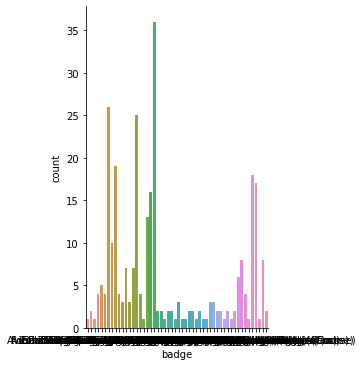

In [100]:
progress_df = df[df["Passed"] == False]
progress_df[["Completed", "Temp1", "Total", "Temp2"]] = progress_df["Tasks"].str.split(" ", expand  = True, n= 3)

progress_df = progress_df.drop(["Temp1", "Temp2", "Tasks"], axis = 1)
progress_df[["Completed", "Total"]] = progress_df[["Completed", "Total"]].apply(pd.to_numeric)
progress_df["Percent"] = progress_df["Completed"]/progress_df["Total"]
progress_df

C:\Users\danie\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,Patrol,Name,badge,Passed,Percent,Completed,Total
0,Swifts,Ephraim R,Better World For Bp Badge (Special),False,0.0,0,1
1,Swifts,Matthew K,Better World For Bp Badge (Special),False,0.0,0,1
2,Swifts,Aiden M,Better World For Bp Badge (Special),False,0.0,0,1
3,Swifts,Cameron B,Better World For Bp Badge (Special),False,0.0,0,1
4,Swifts,Jack C,Better World For Bp Badge (Special),False,0.0,0,1
...,...,...,...,...,...,...,...
7651,Goshawks,Aidan B,Recruiter - Silver Badge (Action),False,0.0,0,1
7652,Goshawks,Bridget H,Recruiter - Silver Badge (Action),False,0.0,0,1
7653,Goshawks,Joel F,Recruiter - Silver Badge (Action),False,0.0,0,1
7654,Goshawks,Juliette M,Recruiter - Silver Badge (Action),False,0.0,0,1


In [101]:
progress_df.sort_values(by = "Percent", ascending=False)

,Patrol,Name,badge,Passed,Percent,Completed,Total
1937,Swifts,Matthew K,Patrol Activities Badge (ScoutCraft),False,1.000000,7,7
6900,Goshawks,Alex M,Attend a LDC 1 Course Badge (Course),False,1.000000,1,1
6981,Kestrels,Luke F,Attend A PLTC Course Badge (Course),False,1.000000,1,1
3381,Goshawks,Ethan G,Computer Badge (Interest),False,1.000000,5,5
1958,Bateleurs,Nina S,Patrol Activities Badge (ScoutCraft),False,0.857143,6,7
...,...,...,...,...,...,...,...
7255,Goshawks,Aidan B,Meerkat Instructor Badge (Challenge),False,NaN,0,0
7256,Goshawks,Bridget H,Meerkat Instructor Badge (Challenge),False,NaN,0,0
7257,Goshawks,Joel F,Meerkat Instructor Badge (Challenge),False,NaN,0,0
7258,Goshawks,Juliette M,Meerkat Instructor Badge (Challenge),False,NaN,0,0


In [108]:
working_on = progress_df[progress_df["Completed"] != 0]
working_on

,Patrol,Name,badge,Passed,Percent,Completed,Total
1088,Kestrels,James W,Charts Badge (ScoutCraft),False,0.666667,4,6
1591,Swifts,Malaika K,Food For Life - 2 Silver Badge (ScoutCraft),False,0.111111,1,9
1601,Eagles,Laura H,Food For Life - 2 Silver Badge (ScoutCraft),False,0.111111,1,9
1616,Kestrels,James W,Food For Life - 2 Silver Badge (ScoutCraft),False,0.111111,1,9
1621,Goshawks,Ethan G,Food For Life - 2 Silver Badge (ScoutCraft),False,0.111111,1,9
...,...,...,...,...,...,...,...
6981,Kestrels,Luke F,Attend A PLTC Course Badge (Course),False,1.000000,1,1
7311,Swifts,Malaika K,COVID-19 Badge (Awareness),False,0.333333,2,6
7319,Eagles,Alex C,COVID-19 Badge (Awareness),False,0.166667,1,6
7326,Bateleurs,Nina S,COVID-19 Badge (Awareness),False,0.166667,1,6


In [109]:
working_on.sort_values(by = "Percent", ascending=False)

,Patrol,Name,badge,Passed,Percent,Completed,Total
3381,Goshawks,Ethan G,Computer Badge (Interest),False,1.000000,5,5
6900,Goshawks,Alex M,Attend a LDC 1 Course Badge (Course),False,1.000000,1,1
6981,Kestrels,Luke F,Attend A PLTC Course Badge (Course),False,1.000000,1,1
1937,Swifts,Matthew K,Patrol Activities Badge (ScoutCraft),False,1.000000,7,7
2187,Kestrels,Bianca D,Survival Badge (ScoutCraft),False,0.857143,6,7
...,...,...,...,...,...,...,...
4503,Eagles,Alex C,Helmsman Badge (Interest),False,0.076923,1,13
4499,Bokmakieries,Laura O,Helmsman Badge (Interest),False,0.076923,1,13
4514,Bateleurs,Mackenzie B,Helmsman Badge (Interest),False,0.076923,1,13
4517,Kestrels,Luke F,Helmsman Badge (Interest),False,0.076923,1,13


In [131]:
bats = working_on[working_on["Patrol"] == "Bateleurs"]
bats["Progress"] = bats["Completed"].map(str) + "/" + bats["Total"].map(str) +  " tasks ("+round(bats["Percent"]*100, 2).map(str)+"%)"
bats

C:\Users\danie\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,Patrol,Name,badge,Passed,Percent,Completed,Total,Progress
1958,Bateleurs,Nina S,Patrol Activities Badge (ScoutCraft),False,0.857143,6,7,6/7 tasks (85.71%)
1964,Bateleurs,Timothy V,Patrol Activities Badge (ScoutCraft),False,0.571429,4,7,4/7 tasks (57.14%)
2310,Bateleurs,Nina S,Advanced Navigation Badge (Interest),False,0.100000,1,10,1/10 tasks (10.0%)
2311,Bateleurs,Thomas C,Advanced Navigation Badge (Interest),False,0.100000,1,10,1/10 tasks (10.0%)
3411,Bateleurs,Thomas C,Cook Badge (Interest),False,0.100000,1,10,1/10 tasks (10.0%)
3412,Bateleurs,Emily G,Cook Badge (Interest),False,0.100000,1,10,1/10 tasks (10.0%)
3416,Bateleurs,Timothy V,Cook Badge (Interest),False,0.100000,1,10,1/10 tasks (10.0%)
4510,Bateleurs,Nina S,Helmsman Badge (Interest),False,0.076923,1,13,1/13 tasks (7.69%)
4513,Bateleurs,Jason F,Helmsman Badge (Interest),False,0.076923,1,13,1/13 tasks (7.69%)
4514,Bateleurs,Mackenzie B,Helmsman Badge (Interest),False,0.076923,1,13,1/13 tasks (7.69%)


In [132]:
bats = bats.pivot(index  = "badge", columns = "Name", values = "Progress")
bats = bats.replace(np.nan, "")
bats.to_excel("badgeut.xlsx")